# Формулировка задачи

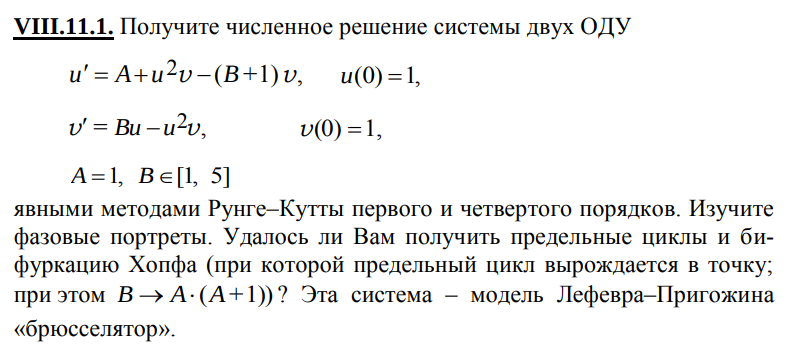

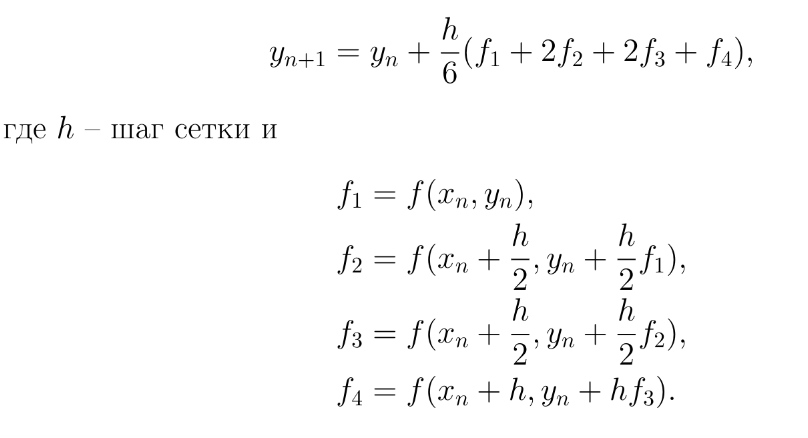

(-0.4962562343750003, 0.49875623437500005)
(0.995037313509038, 1.0049875619578963)
[  0.    0.1   0.2 ...  99.8  99.9 100. ]
[1.         0.75139541 0.58071772 ... 4.55070319 4.92723604 4.61283875]


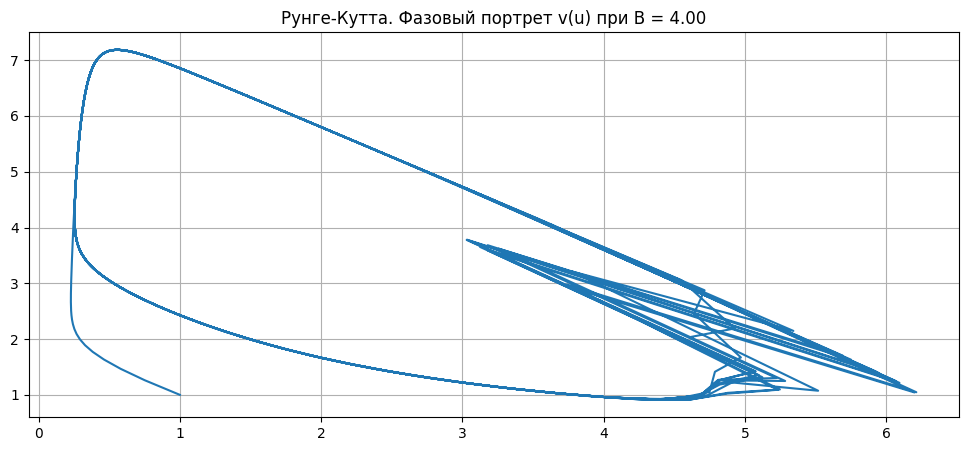

In [70]:
import numpy as np
import matplotlib.pyplot as plt


A = 1

# (u', v') = f (u, v)
def funODU (u, v, B):
    return (A + u*u*v-(B+1)*u, B*u-u*u*v)
print(funODU(0.9975, 1.0025, 1.5))
def RungeNext(x_n, y_n, f, h, B):
    f1 = f(x_n, y_n, B)
    #print("f1")
    #print(f1)
    #print(x_n + f1[0] * h / 2, y_n + f1[1] * h / 2)
    f2 = f(x_n + f1[0] * h / 2, y_n + f1[1] * h / 2, B)
    #print("f2\n", f2)
    f3 = f(x_n + f2[0] * h / 2, y_n + f2[1] * h / 2, B)
    #print("f_3")
    #print(f3)
    f4 = f(x_n + f3[0] * h, y_n + f3[1] * h, B)
    return x_n + h / 6 *((f1[0] + 2*f2[0] + 2*f3[0] + f4[0])), y_n + h / 6 *((f1[1] + 2*f2[1] + 2*f3[1] + f4[1]))

print (RungeNext(1.0, 1.0, funODU, 0.01, 1.5))

t = [0.0]
u = [1.0]
v = [1.0]
h = 0.1
B = 4

for i in range (1, 1000 + 1, 1):
    t = np.append(t, i * h)
    u_new, v_new = RungeNext(u[-1], v[-1], funODU, h, B)
    u = np.append(u, u_new)
    v = np.append(v, v_new)
print (t)
print (u)
plt.figure(figsize=[12, 5], dpi=100)
plt.plot(u, v)
plt.title("Рунге-Кутта. Фазовый портрет v(u) при B = %.2f" %B)
plt.grid()


[  0.    0.1   0.2 ...  99.8  99.9 100. ]
[1.         0.86693252 0.76192841 ... 0.82080661 0.76795149 0.72136366]


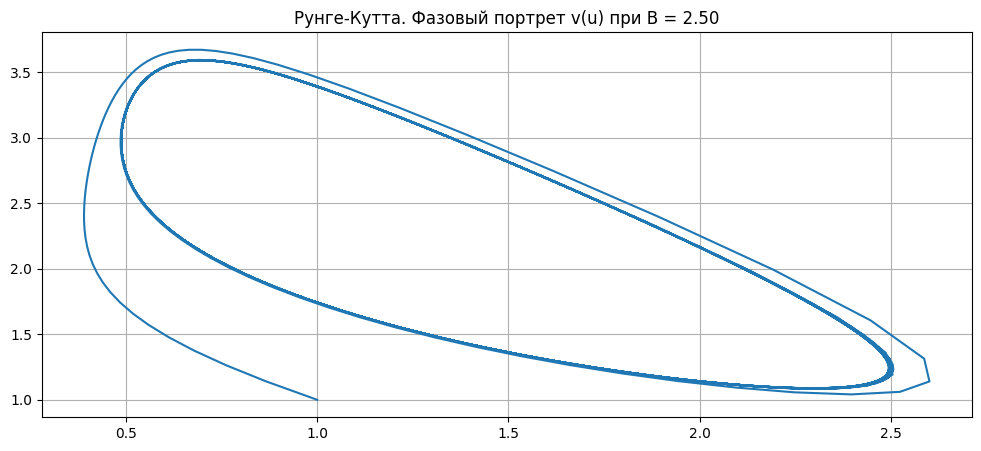

In [71]:
t = [0.0]
u = [1.0]
v = [1.0]
h = 0.1
B = 2.5

for i in range (1, 1000 + 1, 1):
    t = np.append(t, i * h)
    u_new, v_new = RungeNext(u[-1], v[-1], funODU, h, B)
    u = np.append(u, u_new)
    v = np.append(v, v_new)
print (t)
print (u)
plt.figure(figsize=[12, 5], dpi=100)
plt.plot(u, v)
plt.title("Рунге-Кутта. Фазовый портрет v(u) при B = %.2f" %B)
plt.grid()

[  0.    0.1   0.2 ...  99.8  99.9 100. ]
[1.         0.90924153 0.83441312 ... 1.11807182 1.12169174 1.12378605]


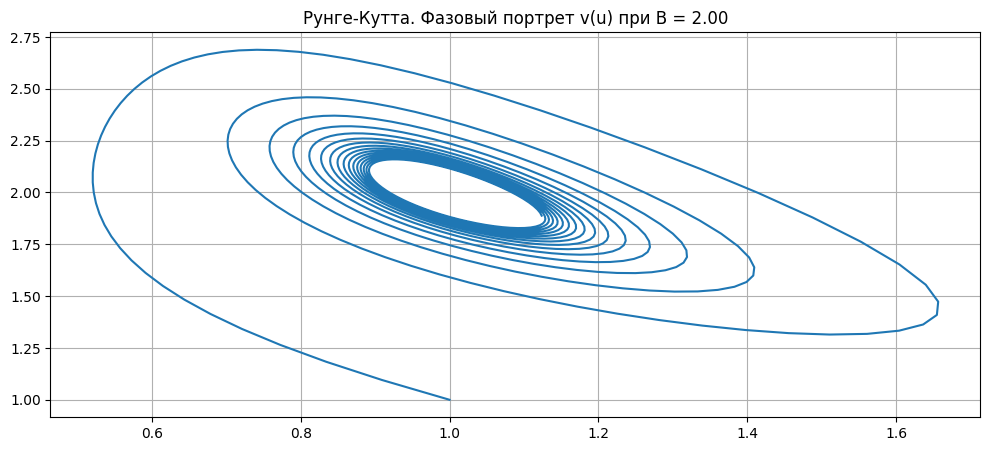

In [72]:
t = [0.0]
u = [1.0]
v = [1.0]
h = 0.1
B = 2

for i in range (1, 1000 + 1, 1):
    t = np.append(t, i * h)
    u_new, v_new = RungeNext(u[-1], v[-1], funODU, h, B)
    u = np.append(u, u_new)
    v = np.append(v, v_new)
print (t)
print (u)
plt.figure(figsize=[12, 5], dpi=100)
plt.plot(u, v)
plt.title("Рунге-Кутта. Фазовый портрет v(u) при B = %.2f" %B)
plt.grid()

[  0.    0.1   0.2 ...  99.8  99.9 100. ]
[1.         0.95357204 0.91364369 ... 1.         1.         1.        ]


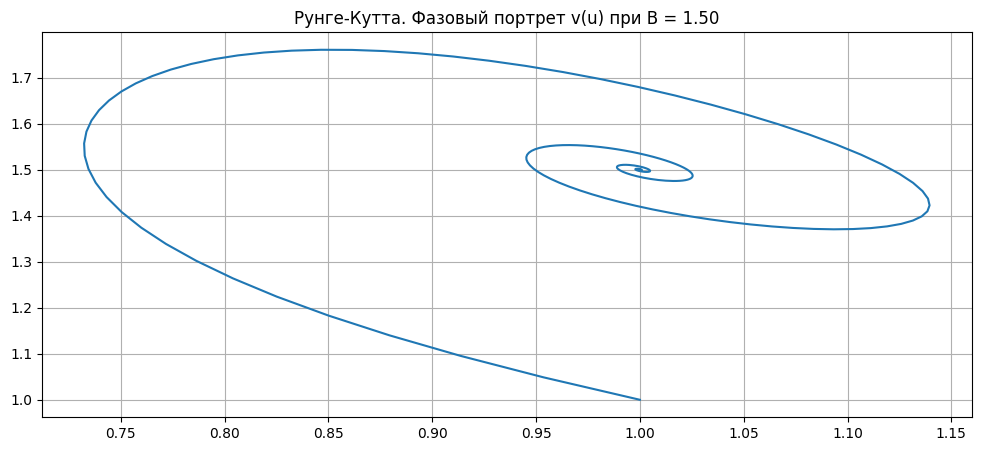

In [73]:
t = [0.0]
u = [1.0]
v = [1.0]
h = 0.1
B = 1.5

for i in range (1, 1000 + 1, 1):
    t = np.append(t, i * h)
    u_new, v_new = RungeNext(u[-1], v[-1], funODU, h, B)
    u = np.append(u, u_new)
    v = np.append(v, v_new)
print (t)
print (u)
plt.figure(figsize=[12, 5], dpi=100)
plt.plot(u, v)
plt.title("Рунге-Кутта. Фазовый портрет v(u) при B = %.2f" %B)
plt.grid()

# Метод Адамса

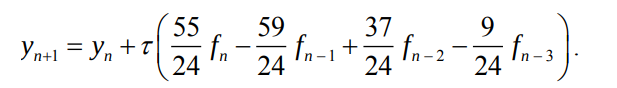

### Посчитаем первые 3 точки методом Рунге Кутты, а последуюшие методом Адамса

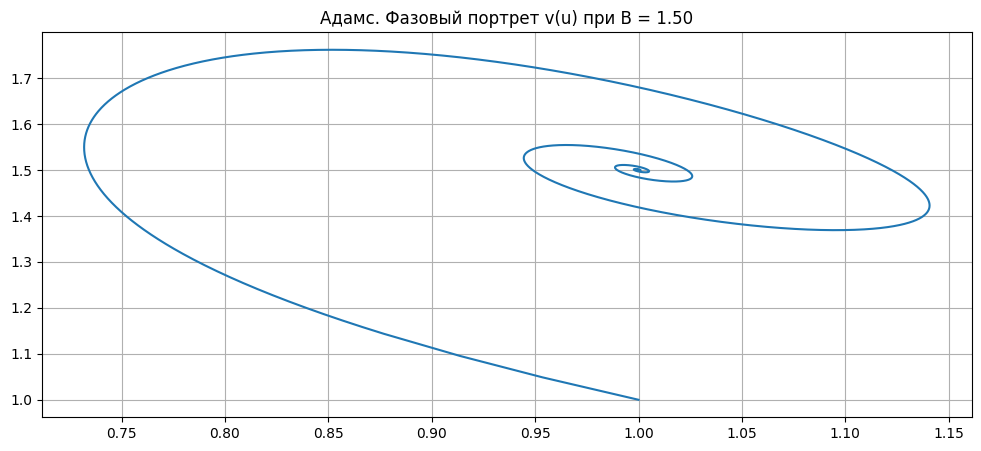

In [74]:
B = 1.5

def AdamsNext(x0, x1, x2, x3, y0, y1, y2, y3, h):
    return (x3, y3)[0] + (55 * funODU(x3, y3, B) + (-59) * funODU(x2, y2, B) + 37 * funODU(x1, y1, B) + (-9) * funODU(x0, y0, B))[0] * h / 24 , (x3, y3)[1] + (55 * funODU(x3, y3, B) + (-59) * funODU(x2, y2, B) + 37 * funODU(x1, y1, B) + (-9) * funODU(x0, y0, B))[1] * h / 24

u = [1.0]
v = [1.0]
t = [0.0]
h = 0.1
for i in range (1, 4, 1):
    t = np.append(t, i * h)
    u_new, v_new = RungeNext(u[-1], v[-1], funODU, h, B)
    u = np.append(u, u_new)
    v = np.append(v, v_new)

for i in range (4, 10000 + 1, 1):
    t = np.append(t, i * h)
    u_new, v_new = AdamsNext(u[-4], u[-3], u[-2], u[-1], v[-4], v[-3], v[-2], v[-1], h)
    u = np.append(u, u_new)
    v = np.append(v, v_new)

plt.figure(figsize=[12, 5], dpi=100)
plt.plot(u, v)
plt.title("Адамс. Фазовый портрет v(u) при B = %.2f" %B)
plt.grid()

## Изобразим также u(t) и v(t):

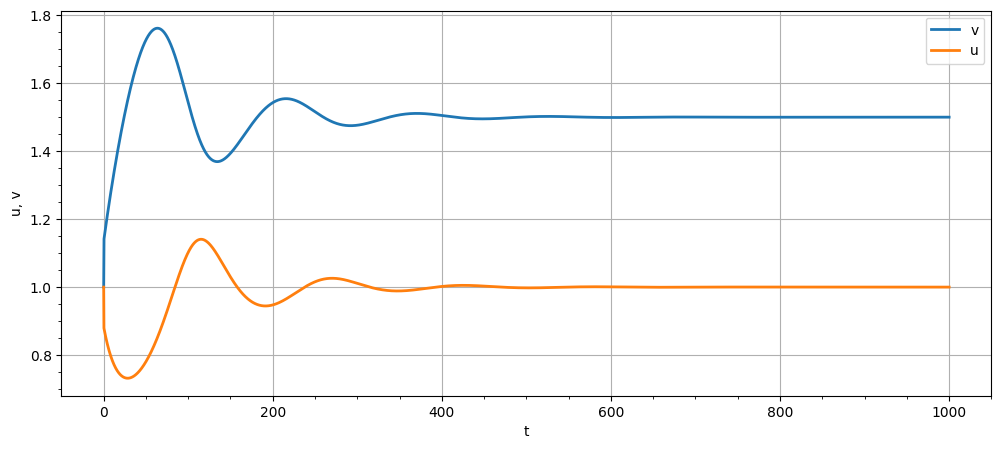

In [103]:
plt.figure(figsize=[12, 5], dpi=100)
plt.plot(t, v, linewidth=2, label='v')
plt.plot(t, u, linewidth=2, label='u')
plt.xlabel("t")
plt.ylabel("u, v")
plt.legend()
plt.minorticks_on()
plt.grid()
plt.show()